In [1]:
import yfinance as yf
import pandas as pd

In [2]:
import csv
tickerName = input("Ticker:")
period = input("Period:")
interval = input("Interval:")

In [3]:
ticker = yf.Ticker(tickerName)
df = ticker.history(period = period, interval = interval)
df = df.drop(['Dividends', 'Stock Splits'], axis = 1)
df.to_csv(f"./stock_data/{tickerName}.csv")
df = pd.read_csv(f"./stock_data/{tickerName}.csv")

In [4]:
df = df.assign(**{'Open(t-1)': df['Open'].shift(-1)},
                   **{'Close(t-1)': df['Close'].shift(-1)},
                   **{'High(t-1)': df['High'].shift(-1)},
                   **{'Low(t-1)': df['Low'].shift(-1)},
                   **{'Volume(t-1)': df['Volume'].shift(-1)},
                   **{'Open(t-2)': df['Open'].shift(-2)},
                   **{'Close(t-2)': df['Close'].shift(-2)},
                   **{'High(t-2)': df['High'].shift(-2)},
                   **{'Low(t-2)': df['Low'].shift(-2)},
                   **{'Volume(t-2)': df['Volume'].shift(-2)},
                   **{'Open(t-3)': df['Open'].shift(-3)},
                   **{'Close(t-3)': df['Close'].shift(-3)},
                   **{'High(t-3)': df['High'].shift(-3)},
                   **{'Low(t-3)': df['Low'].shift(-3)},
                   **{'Volume(t-3)': df['Volume'].shift(-3)})

df

,Date,Open,High,Low,Close,Volume,Open(t-1),Close(t-1),High(t-1),Low(t-1),...,Open(t-2),Close(t-2),High(t-2),Low(t-2),Volume(t-2),Open(t-3),Close(t-3),High(t-3),Low(t-3),Volume(t-3)
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.719333,1.588667,2.028000,1.553333,...,1.666667,1.464000,1.728000,1.351333,123282000.0,1.533333,1.280000,1.540000,1.247333,77097000.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.666667,1.464000,1.728000,1.351333,...,1.533333,1.280000,1.540000,1.247333,77097000.0,1.333333,1.074000,1.333333,1.055333,103003500.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.533333,1.280000,1.540000,1.247333,...,1.333333,1.074000,1.333333,1.055333,103003500.0,1.093333,1.053333,1.108667,0.998667,103825500.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.333333,1.074000,1.333333,1.055333,...,1.093333,1.053333,1.108667,0.998667,103825500.0,1.076000,1.164000,1.168000,1.038000,115671000.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.093333,1.053333,1.108667,0.998667,...,1.076000,1.164000,1.168000,1.038000,115671000.0,1.172000,1.160000,1.193333,1.103333,60759000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2025-01-17 00:00:00-05:00,421.500000,439.739990,419.750000,426.500000,94991400,432.640015,424.070007,433.200012,406.309998,...,416.809998,415.109985,428.000000,414.589996,60963300.0,416.059998,412.380005,420.730011,408.950012,50690600.0
3663,2025-01-21 00:00:00-05:00,432.640015,433.200012,406.309998,424.070007,87320900,416.809998,415.109985,428.000000,414.589996,...,416.059998,412.380005,420.730011,408.950012,50690600.0,414.450012,406.579987,418.880005,405.779999,56140900.0
3664,2025-01-22 00:00:00-05:00,416.809998,428.000000,414.589996,415.109985,60963300,416.059998,412.380005,420.730011,408.950012,...,414.450012,406.579987,418.880005,405.779999,56140900.0,NaN,NaN,NaN,NaN,NaN
3665,2025-01-23 00:00:00-05:00,416.059998,420.730011,408.950012,412.380005,50690600,414.450012,406.579987,418.880005,405.779999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop(['High', 'Low', 'Close', 'Volume'], axis = 1)
df = df.dropna()

df = df.copy()
#df['Datetime'] = pd.to_datetime(df['Datetime'], utc = True)
#df = df.set_index('Datetime')
print(df.index)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663],
      dtype='int64', length=3664)


In [6]:
x = df[['Open',
        'Open(t-1)', 'Close(t-1)', 'High(t-1)', 'Low(t-1)', 'Volume(t-1)',
        'Open(t-2)', 'Close(t-2)', 'High(t-2)', 'Low(t-2)', 'Volume(t-2)',
        'Open(t-3)', 'Close(t-3)', 'High(t-3)', 'Low(t-3)', 'Volume(t-3)']].values
y = df['Close'].values

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True, stratify=skf)

InvalidParameterError: The 'stratify' parameter of train_test_split must be an array-like or None. Got StratifiedKFold(n_splits=5, random_state=None, shuffle=False) instead.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

regressor = LinearRegression()

model = regressor.fit(x_train, y_train)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
predicted = regressor.predict(x_test)
dframe = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})
dframe

,Actual,Predicted
0,216.740005,218.347625
1,194.550003,194.612878
2,252.410004,252.552176
3,256.939911,256.977618
4,339.549988,340.336601
...,...,...
694,176.889999,176.766024
695,234.029999,232.188052
696,212.842300,212.328718
697,190.865005,189.904777


In [11]:
df

,Datetime,Open,High,Low,Close,Volume,Open(t-1),Close(t-1),High(t-1),Low(t-1),...,Open(t-2),Close(t-2),High(t-2),Low(t-2),Volume(t-2),Open(t-3),Close(t-3),High(t-3),Low(t-3),Volume(t-3)
0,2023-01-11 09:30:00-05:00,122.089996,125.949997,120.510002,125.059998,61053436,125.044998,122.639999,125.059998,122.050003,...,122.620003,122.519997,123.389999,122.199997,17872441.0,122.540001,122.050003,122.779999,121.500000,18843818.0
1,2023-01-11 10:30:00-05:00,125.044998,125.059998,122.050003,122.639999,34945204,122.620003,122.519997,123.389999,122.199997,...,122.540001,122.050003,122.779999,121.500000,18843818.0,122.042900,122.080002,122.583603,121.639999,14025043.0
2,2023-01-11 11:30:00-05:00,122.620003,123.389999,122.199997,122.519997,17872441,122.540001,122.050003,122.779999,121.500000,...,122.042900,122.080002,122.583603,121.639999,14025043.0,122.074997,122.872398,122.899902,121.279999,18951059.0
3,2023-01-11 12:30:00-05:00,122.540001,122.779999,121.500000,122.050003,18843818,122.042900,122.080002,122.583603,121.639999,...,122.074997,122.872398,122.899902,121.279999,18951059.0,122.875000,123.208603,123.269997,122.135002,13548729.0
4,2023-01-11 13:30:00-05:00,122.042900,122.583603,121.639999,122.080002,14025043,122.074997,122.872398,122.899902,121.279999,...,122.875000,123.208603,123.269997,122.135002,13548729.0,122.559998,119.589996,122.919998,117.000000,57945507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,2025-01-08 15:30:00-05:00,396.269989,397.890015,394.500000,395.000000,5044424,389.179993,390.095001,399.250000,383.489990,...,390.146210,388.141388,396.149994,387.600006,10050184.0,388.084991,391.469910,391.959991,387.000000,5850880.0
3487,2025-01-10 09:30:00-05:00,389.179993,399.250000,383.489990,390.095001,21051200,390.146210,388.141388,396.149994,387.600006,...,388.084991,391.469910,391.959991,387.000000,5850880.0,391.250000,397.359985,398.299896,391.089996,7338083.0
3488,2025-01-10 10:30:00-05:00,390.146210,396.149994,387.600006,388.141388,10050184,388.084991,391.469910,391.959991,387.000000,...,391.250000,397.359985,398.299896,391.089996,7338083.0,397.500000,395.760010,397.790009,393.670105,5234008.0
3489,2025-01-10 11:30:00-05:00,388.084991,391.959991,387.000000,391.469910,5850880,391.250000,397.359985,398.299896,391.089996,...,397.500000,395.760010,397.790009,393.670105,5234008.0,395.811005,393.959991,396.950012,393.131195,4660858.0


In [12]:
df['Open'].iloc[-2]

np.float64(388.0849914550781)

In [13]:
data_for_next_close = [float(input("Open:")), 
                        df['Open'].iloc[-1], df['Close'].iloc[-1], df['High'].iloc[-1], df['Low'].iloc[-1], df['Volume'].iloc[-1],
                        df['Open(t-1)'].iloc[-1], df['Close(t-1)'].iloc[-1], df['High(t-1)'].iloc[-1], df['Low(t-1)'].iloc[-1], df['Volume(t-1)'].iloc[-1],
                        df['Open(t-2)'].iloc[-1], df['Close(t-2)'].iloc[-1], df['High(t-2)'].iloc[-1], df['Low(t-2)'].iloc[-1], df['Volume(t-2)'].iloc[-1]]

prediction = regressor.predict([data_for_next_close])
prediction

array([392.65886415])

In [14]:
print(mean_squared_error(y_test, predicted))
print(mean_absolute_error(y_test, predicted))
print(median_absolute_error(y_test, predicted))

3.297984559397841
0.9689812433684067
0.5615890928533815


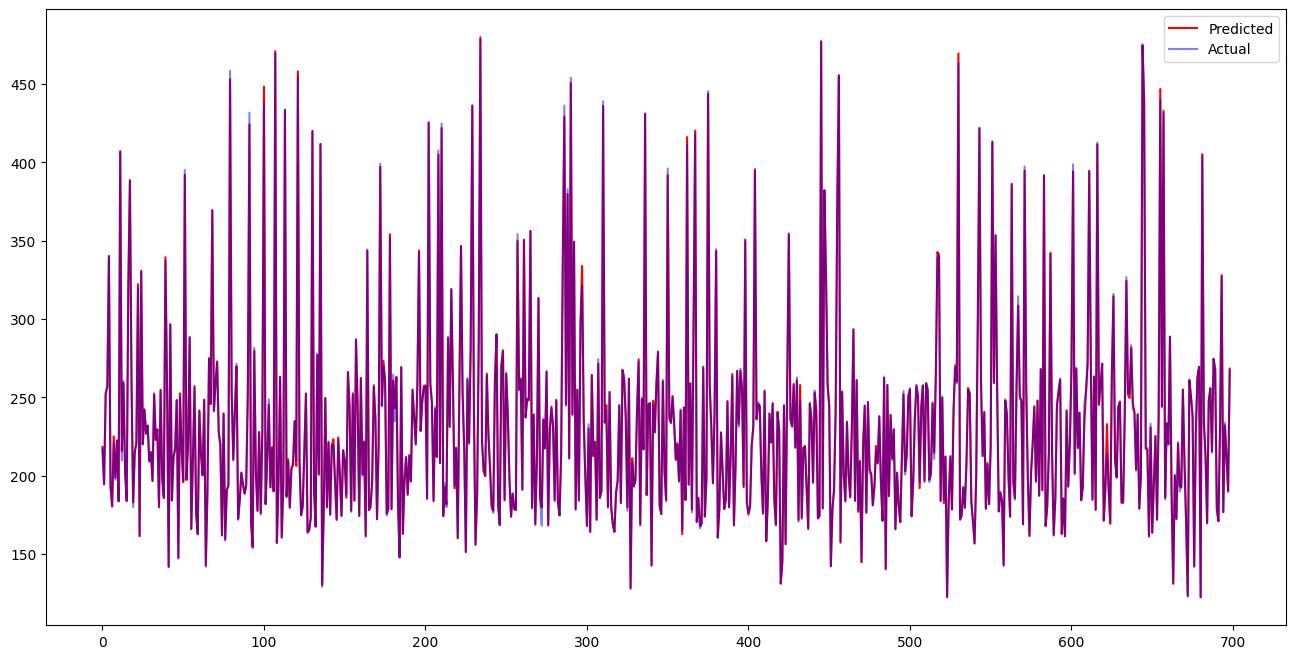

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(dframe['Predicted'], label='Predicted', color='red', markersize=3)
plt.plot(dframe['Actual'], label='Actual', color='blue', markersize=3, alpha = 0.5)
plt.legend()

In [ ]:
avg_close_change = abs(df['Close'].diff())
avg_close_change = avg_close_change.mean()

new_row = [tickerName, period, interval, avg_close_change,
           mean_absolute_error(y_test, predicted), 
           median_absolute_error(y_test, predicted)]

with open('./history.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(new_row)

In [89]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(x):
    x_time_train, x_time_test = x[train_index], x[test_index]
    y_time_train, y_time_test = y[train_index], y[test_index]

    time_model = regressor.fit(x_time_train, y_time_train)
    time_predicted = time_model.predict(x_time_test)
    print(mean_squared_error(y_time_test, time_predicted))
    print(mean_absolute_error(y_time_test, time_predicted))
    print(median_absolute_error(y_time_test, time_predicted))

2.0131446952883474
0.9162544164060783
0.5804585612734172
1.275094453350071
0.7708875921792088
0.585413479268766
1.711427972166506
0.7033756159616248
0.4036579917599852
2.1774690509645125
0.8593253991450516
0.5252422698183068
5.871834350975894
1.355620128249347
0.718572498513879
